In [1]:
from ctypes import windll
windll.shcore.SetProcessDpiAwareness(1)
import tkinter as tk
import pickle
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def process(d1,d2,w1,w2):
    #由你的电脑的屏幕大小来决定
    def get_screen_size():
        root = tk.Tk()
        screen_width = root.winfo_screenwidth()
        screen_height = root.winfo_screenheight()
        root.destroy()
        return screen_width, screen_height
    
    #实验数据产生的设备的屏幕大小
    screen_wide,screen_high=get_screen_size()

    print(screen_wide,screen_high)
    
    r=101
    l=2
    
    n=(d2-d1)/(r-1)
    m=(w2-w1)/(l-1)
    
    D_W_mix=[(0,0)]
    for i in range(r-1):
        for j in range(l-1):
            D_W_mix.append((d2-i*n,w1+j*m))
    
    
    D_W_mix=D_W_mix[::-1]
    print(D_W_mix)
    
    x_edge1=[]
    x_edge2=[]
    x_edge3=[]
    x_edge4=[]
    
    for i in range(len(D_W_mix)):
    
        x_edge1.append(screen_wide/2-D_W_mix[i][0]/2-D_W_mix[i][1]/2)
        x_edge2.append(screen_wide/2-D_W_mix[i][0]/2+D_W_mix[i][1]/2)
        x_edge3.append(screen_wide/2+D_W_mix[i][0]/2-D_W_mix[i][1]/2)
        x_edge4.append(screen_wide/2+D_W_mix[i][0]/2+D_W_mix[i][1]/2)
    
    for i in range(len(x_edge1)):
        if(x_edge2[i]-x_edge1[i]!=D_W_mix[i][1]):
            print('D_W_mix',i,'的数据不正确')
            
        if(x_edge3[i]-x_edge1[i]!=D_W_mix[i][0]):
            print('D_W_mix',i,'的数据不正确')
            
    #print(x_edge1[0],x_edge2[0],x_edge3[0],x_edge4[0])

    

    def read_data(d1,d2,w1,w2):
        '''
        通过D,和W的大小来区分和读取数据，并返回四个数据结果。
        '''
        name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

        with open(name,'rb') as file:
            move_datas=pickle.load(file)
        
        return move_datas

    mouse_move=read_data(d1,d2,w1,w2)

    
    for i in range(len(mouse_move)):
        pass
        #print(np.shape(mouse_move[i]))

    def clean(mouse_move):
        new1=[]
        for i in range(len(mouse_move)):
            new2=[]
            t=-1
            x=-1
            y=-1
            for j in range(len(mouse_move[i])):
                
                if t==mouse_move[i][j][0] and x==mouse_move[i][j][1] and y==mouse_move[i][j][2]:
                    t=mouse_move[i][j][0]
                    x=mouse_move[i][j][1]
                    y=mouse_move[i][j][2]
                    continue
                else:
                    t=mouse_move[i][j][0]
                    x=mouse_move[i][j][1]
                    y=mouse_move[i][j][2]
                    new2.append(mouse_move[i][j])
            new1.append(new2)
        return new1

    mouse_move=clean(mouse_move)

    def average(mouse_move):
        new=[]
        for i in range(len(mouse_move)):
            new1=[]
            for j in range(len(mouse_move[i])-1):
                t=mouse_move[i][j][0]
                if mouse_move[i][j][0]==mouse_move[i][j+1][0]:
                    r=1
                    for k in range(j+1,len(mouse_move[i])-1):
                        if mouse_move[i][j][0]==mouse_move[i][k][0]:
                            r+=1
                            #print(k)
                    #print('对于',mouse_move[i][j][0],'有',r,'个连续重复值')
                    
                    t0=mouse_move[i][j-1][0]
                    t1=mouse_move[i][j+r][0]
                    m=(t1-t0)/(r+1)
                    t=t0+m*2
                    
                new1.append([t,mouse_move[i][j][1],mouse_move[i][j][2]])
            new.append(new1)    
        
        for i in range(len(new)):
            for j in range(len(new[i])-1):
                if new[i][j][0]==new[i][j+1][0]:
                    print('存在前后相同点：',i,j)
        
        return new

    mouse_move=average(mouse_move)
    
    t=[]
    for i in range(len(mouse_move)):
        #print(np.shape(mouse_move[i]))
        #print(mouse_move[i][-1][0]-mouse_move[i][0][0])
        t.append(mouse_move[i][-1][0]-mouse_move[i][0][0])

    print('平均时间为',np.mean(t))
    
    ind=[]
    
    #print(x_edge1,x_edge2,x_edge3,x_edge4)
    
    for i in range(len(mouse_move)):
        x1=0
        x2=0
        for j in range(len(mouse_move[i])):
            if mouse_move[i][j][1]>x_edge2[i]:
                x1=j
                break
        for k in range(len(mouse_move[i])):
            if mouse_move[i][k][1]>x_edge3[i]:
                x2=k
                break
        ind.append([x1,x2])
    print(ind)
    
    times=[]
    all_t1=[]
    all_t2=[]
    all_t3=[]
    all_t4=[]

    for i in range(len(ind)):
        t0=mouse_move[i][0][0]
        t1=mouse_move[i][ind[i][0]][0]-t0
        t2=mouse_move[i][ind[i][1]][0]-t0
        t3=mouse_move[i][-1][0]-t0
        
        d_t1=t1
        d_t2=t2-t1
        d_t3=t3-t2
        
        all_t1.append(d_t1)
        all_t2.append(d_t2)
        all_t3.append(d_t3)
        all_t4.append(t3)
        
        #print(t1,t2,t3)
        times.append([d_t1,d_t2,d_t3,t3])

    def mean_without_max_min(arr):
        
        # 找到最大值和最小值
        max_value = np.max(arr)
        min_value = np.min(arr)

        # 使用布尔数组作为索引，找到不等于最大值和最小值的元素
        arr_without_extremes = (np.sum(arr)-max_value-min_value)/(len(arr)-2)

        return arr_without_extremes
    #mean_t1,mean_t2,mean_t3,mean_t4=mean_without_max_min(all_t1),mean_without_max_min(all_t2),mean_without_max_min(all_t3),mean_without_max_min(all_t4)
    mean_t1,mean_t2,mean_t3,mean_t4=np.mean(all_t1),np.mean(all_t2),np.mean(all_t3),np.mean(all_t4)#没有去掉最大最小值
    times.append([mean_t1,mean_t2,mean_t3,mean_t4])

    return times

import os
import random
folder_path=sys.path[0]+'\image'
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
    print(f"Folder '{folder_path}' created successfully.")



d1,d2=125,2500
w1,w2=80,80

    
folder_path=sys.path[0]+'\image\W='+str(w1)
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
    print(f"Folder '{folder_path}' created successfully.")

times=process(d1,d2,w1,w2)

colors = [
('red', '#FF0000'),
('orange', '#FFA500'),
('yellow', '#FFFF00'),
('green', '#00FF00'),
('blue', '#0000FF'),
('cyan', '#00FFFF'),
('purple', '#800080'),
('black', '#000000'),

('lime', '#00FF00'),

('magenta', '#FF00FF'),

('darkred', '#8B0000'),
('darkgreen', '#006400'),
('darkblue', '#00008B'),
('darkgoldenrod', '#B8860B'),

('hotpink', '#FF69B4'),
('teal', '#008080'),
('silver', '#C0C0C0'),
('saddlebrown', '#8B4513'),

]

plt.figure(dpi=200)
X=[1,2,3,4]
for k in range(len(times)):
    #plt.axis('equal')
    # 绘制原始数据和拟合曲线
    plt.plot(X,times[k],color=colors[random.randint(0, len(colors)-1)][0],lw=1)
    #for j in range(len(times[k][-1])):
        #plt.text(X[j], times[k][-1][j], str(times[k][-1][j]), ha='center', va='bottom')
plt.xlabel('time')
plt.ylabel('value')
plt.title('W=60')
#plt.legend()
plt.grid(True)
plt.show()

# 保存图像为PNG格式
#plt.savefig(folder_path+'\\W=60.png')

# 可以选择保存为其他格式，比如JPEG格式
# plt.savefig('example.jpg')

# 保存后需要关闭绘图窗口
plt.close()

2560 1600
[(148.75, 80.0), (172.5, 80.0), (196.25, 80.0), (220.0, 80.0), (243.75, 80.0), (267.5, 80.0), (291.25, 80.0), (315.0, 80.0), (338.75, 80.0), (362.5, 80.0), (386.25, 80.0), (410.0, 80.0), (433.75, 80.0), (457.5, 80.0), (481.25, 80.0), (505.0, 80.0), (528.75, 80.0), (552.5, 80.0), (576.25, 80.0), (600.0, 80.0), (623.75, 80.0), (647.5, 80.0), (671.25, 80.0), (695.0, 80.0), (718.75, 80.0), (742.5, 80.0), (766.25, 80.0), (790.0, 80.0), (813.75, 80.0), (837.5, 80.0), (861.25, 80.0), (885.0, 80.0), (908.75, 80.0), (932.5, 80.0), (956.25, 80.0), (980.0, 80.0), (1003.75, 80.0), (1027.5, 80.0), (1051.25, 80.0), (1075.0, 80.0), (1098.75, 80.0), (1122.5, 80.0), (1146.25, 80.0), (1170.0, 80.0), (1193.75, 80.0), (1217.5, 80.0), (1241.25, 80.0), (1265.0, 80.0), (1288.75, 80.0), (1312.5, 80.0), (1336.25, 80.0), (1360.0, 80.0), (1383.75, 80.0), (1407.5, 80.0), (1431.25, 80.0), (1455.0, 80.0), (1478.75, 80.0), (1502.5, 80.0), (1526.25, 80.0), (1550.0, 80.0), (1573.75, 80.0), (1597.5, 80.0), (1

FileNotFoundError: [Errno 2] No such file or directory: 'd:\\Users\\liuyu\\Desktop\\1Fizz_GUI\\8-1-1\\data\\D=125-2500_W=80-80.bin'

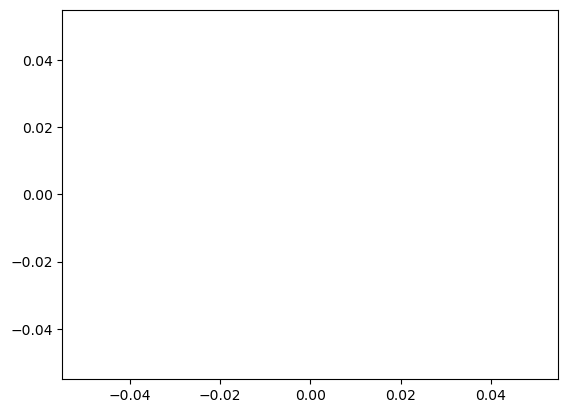

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
#matplotlib.use('TkAgg')

# 创建一个空白图表
fig, ax = plt.subplots()
# 创建一个空的线条对象
line, = ax.plot([], [], lw=1)

# 初始化函数，用于设置图表的初始状态
def init():
    ax.set_xlim(1, 4)
    ax.set_ylim(0, 2)
    return line,

# 更新函数，每帧会被调用一次
def update(frame):
    # 绘制数据数组的前frame个元素
    line.set_data([1,2,3,4], times[frame])
    #frame += 1
    return line,

# 创建动画
# interval是每帧之间的间隔时间（以毫秒为单位）
# blit=True表示只更新变化的部分，可以提高绘制速度
ani = FuncAnimation(fig, update, frames=len(times), init_func=init, blit=False)

plt.show()
